<a href="https://colab.research.google.com/github/sparab2/MachineLearning/blob/main/Homework2Q4_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# load the dataset
breast = load_breast_cancer()
X = breast.data
print(X.shape)
Y = breast.target

(569, 30)


In [3]:
breast_input = pd.DataFrame(X)
breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
class LogisticRegressionGradientDescentWeight:
    def __init__(self, learning_rate=0.06, max_iter=100):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = None
        
    def sigmoid(self, x):
        x = np.clip(x, -500, 500)
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y, alpha=0.1):
        # Initialize the weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        # Gradient descent algorithm with L2 regularization
        for i in range(self.max_iter):
            # Calculate the linear combination of weights and features
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply the sigmoid function to get the predicted probabilities
            y_pred = self.sigmoid(linear_model)
            
            # Compute the gradient of the loss function with respect to the weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y)) + alpha * self.weights
            db = (1 / n_samples) * np.sum(y_pred - y)
            
            # Update the weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        # Calculate the linear combination of weights and features
        linear_model = np.dot(X, self.weights) + self.bias
        
        # Apply the sigmoid function to get the predicted probabilities
        y_pred = self.sigmoid(linear_model)
        
        # Convert the probabilities to binary predictions
        y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
        
        return y_pred_binary


In [7]:
# Scale the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
# Create KFold object
kf5 = KFold(n_splits=5, shuffle=True, random_state=42)
kf10 = KFold(n_splits=10, shuffle=True, random_state=42)

In [11]:
# Initialize lists to store evaluation metrics
acc_scores_5 = []
prec_scores_5 = []
rec_scores_5 = []
conf_matrices_5 = []

acc_scores_10 = []
prec_scores_10 = []
rec_scores_10 = []
conf_matrices_10 = []

In [12]:
# Perform cross-validation
for train_idx, test_idx in kf5.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    # create a logistic regression model with weight penalty
    model = LogisticRegressionGradientDescentWeight(learning_rate=0.06, max_iter=100)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    acc_scores_5.append(accuracy_score(y_test, y_pred))
    prec_scores_5.append(precision_score(y_test, y_pred))
    rec_scores_5.append(recall_score(y_test, y_pred))
    conf_matrices_5.append(confusion_matrix(y_test, y_pred))

In [13]:
# Calculate and print the average evaluation metrics
avg_acc_5 = sum(acc_scores_5) / len(acc_scores_5)
avg_prec_5 = sum(prec_scores_5) / len(prec_scores_5)
avg_rec_5 = sum(rec_scores_5) / len(rec_scores_5)
avg_conf_5 = sum(conf_matrices_5) / len(conf_matrices_5)

print("K=5 results:")
print(f"Average accuracy: {avg_acc_5:.3f}")
print(f"Average precision: {avg_prec_5:.3f}")
print(f"Average recall: {avg_rec_5:.3f}")
print(f"Average confusion matrix:\n{avg_conf_5}")

K=5 results:
Average accuracy: 0.968
Average precision: 0.969
Average recall: 0.981
Average confusion matrix:
[[40.2  2.2]
 [ 1.4 70. ]]


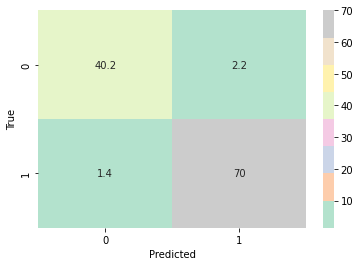

In [14]:
# plot the confusion matrix for K=5 as a heatmap
sns.heatmap(avg_conf_5, annot=True, fmt='g', cmap='Pastel2')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [15]:
for train_idx, test_idx in kf10.split(X):
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = Y[train_idx], Y[test_idx]

    # create a logistic regression model with weight penalty
    model = LogisticRegressionGradientDescentWeight(learning_rate=0.06, max_iter=100)

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Evaluate the model
    acc_scores_10.append(accuracy_score(y_test, y_pred))
    prec_scores_10.append(precision_score(y_test, y_pred))
    rec_scores_10.append(recall_score(y_test, y_pred))
    conf_matrices_10.append(confusion_matrix(y_test, y_pred))

In [16]:
# Calculate and print the average evaluation metrics
avg_acc_10 = sum(acc_scores_10) / len(acc_scores_10)
avg_prec_10 = sum(prec_scores_10) / len(prec_scores_10)
avg_rec_10 = sum(rec_scores_10) / len(rec_scores_10)
avg_conf_10 = sum(conf_matrices_10) / len(conf_matrices_10)

print("K=10 results:")
print(f"Average accuracy: {avg_acc_10:.3f}")
print(f"Average precision: {avg_prec_10:.3f}")
print(f"Average recall: {avg_rec_10:.3f}")
print(f"Average confusion matrix:\n{avg_conf_10}")

K=10 results:
Average accuracy: 0.968
Average precision: 0.969
Average recall: 0.981
Average confusion matrix:
[[20.1  1.1]
 [ 0.7 35. ]]


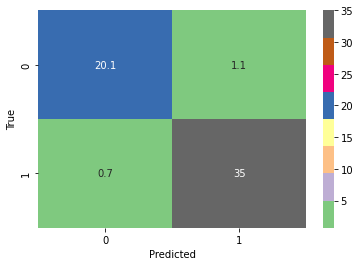

In [17]:
# plot the confusion matrix for K=10 as a heatmap
sns.heatmap(avg_conf_10, annot=True, fmt='g', cmap='Accent')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()